In [34]:
# 深度网络+dropout

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import time
import sys
import tensorflow as tf
from tensorflow.python import keras


print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.14.5
pandas 0.23.0
sklearn 0.19.1
tensorflow 2.0.0
tensorflow.python.keras 2.2.4-tf


In [35]:
# 实战分类模型 数据读取与展示
# https://github.com/Dean0371/Tensorflow2.0/blob/225eb6f56a1df56b101b546a694f4825a8e0429e/Tensorflow2.0_%E8%B0%B7%E6%AD%8C/2_Keras/tf_keras_classification_model.py

In [36]:
# 导入数据
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# numpy的格式，前5000个是验证集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# x_train.reshape(-1, 1).shape

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [37]:
print(np.max(x_train), np.min(x_train))

255 0


In [38]:
# x = (x - u) / std 数据符合标准正态分布

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [39]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.023144 -0.81051385


In [40]:
# 实战分类模型 模型构建

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
# softmax : x = [x1, x2, x3],将向量变成概率分布
# y = [e^x1/sum, e^x2/sum,e^x3/sum]   sum = e^x1+e^x2+e^x3

# reason for sparse:y->index, index->one hot->[0,...,1,...0]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",  # 优化方法，若loss太低,可能是算法的问题,换用优化过的梯度下降算法
              metrics = ['accuracy'])

"""
或
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
"""

'\n或\nmodel = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[28,28]),\n    keras.layers.Dense(300,activation="relu"),\n    keras.layers.Dense(100,activation="relu"),\n    keras.layers.Dense(10,activation="softmax")\n])\n'

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_84 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_85 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_86 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_87 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_88 (Dense)             (None, 100)              

In [42]:
# [None, 784] * w + b -> [None, 300] w.shape [784, 300], b = [300]

In [43]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only = True),  # 默认保存最近一次训练,True表示保存效果最好的
    keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3)  # 提前结束 当阈值低于1e-3时记录一次,5次后停止
]
history = model.fit(x_train_scaled,y_train,epochs=10,
                    validation_data=(x_valid_scaled,y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 181us/sample - loss: 2.1445 - accuracy: 0.1770 - val_loss: 1.6195 - val_accuracy: 0.2450
Epoch 2/10
55000/55000 [==============================] - 9s 162us/sample - loss: 0.9664 - accuracy: 0.6283 - val_loss: 1.0126 - val_accuracy: 0.6000
Epoch 3/10
55000/55000 [==============================] - 9s 166us/sample - loss: 0.6043 - accuracy: 0.7747 - val_loss: 0.4849 - val_accuracy: 0.8362
Epoch 4/10
55000/55000 [==============================] - 9s 169us/sample - loss: 0.4978 - accuracy: 0.8307 - val_loss: 0.4661 - val_accuracy: 0.8432
Epoch 5/10
55000/55000 [==============================] - 9s 169us/sample - loss: 0.4361 - accuracy: 0.8519 - val_loss: 0.4191 - val_accuracy: 0.8604
Epoch 6/10
55000/55000 [==============================] - 9s 169us/sample - loss: 0.4086 - accuracy: 0.8605 - val_loss: 0.4090 - val_accuracy: 0.8630
Epoch 7/10
55000/55000 [==========================

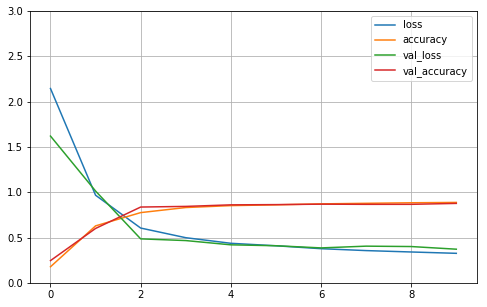

In [45]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()

plot_learning_curves(history)

# 1.参数众多，训练不充分
# 2.梯度消失 -> 链式法则 -> 复合求导

In [46]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.40260423707962034, 0.8661]